In [1]:
import matplotlib.pyplot as plt
import numpy as np
import io,os,glob,scipy
from h5py import File
from netCDF4 import Dataset
import datetime as dt
import lpdm

In [24]:
fid = Dataset(receptors[0],'r')
ti = fid['time'][:]
t = np.array([dt.datetime(1970,1,1) + dt.timedelta(seconds=ti[i]) for i in range(24)])

In [25]:
nmlist = receptors[0].split('col_footprints')
rec_50_dir = nmlist[0]
tmp = nmlist[1].split('col')
rec_50_fname=tmp[0]+'50'+tmp[1]
fid2 = Dataset(rec_50_dir+rec_50_fname,'r')
ti = fid2['time'][:]
t2 = np.array([dt.datetime(1970,1,1) + dt.timedelta(seconds=ti[i]) for i in range(24)])

In [109]:
from importlib import reload
reload(lpdm)
ctl = lpdm.lpdm('config.ini.nyc', debug=False)
with open(ctl.workdir+'col_receptors.asc') as f:
    receptors = [line.rstrip() for line in f]
grid, griddates, lats, lons = ctl.get_footprint(receptors[0], extract_domain=False)

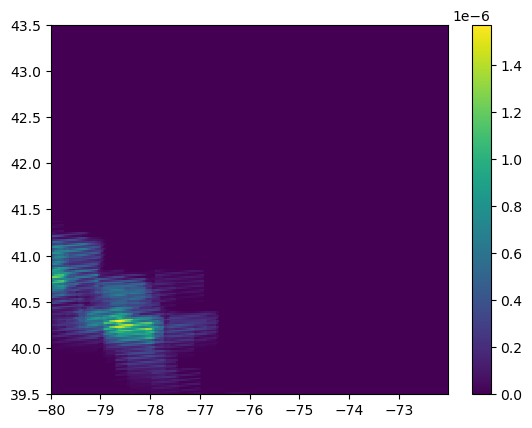

In [149]:
plt.pcolormesh(lons,lats,grid[0]); plt.colorbar()

In [141]:
h = scipy.sparse.load_npz(ctl.full_hdir+'/H0024.npz')
print(h.todense().shape)
h2 = scipy.sparse.load_npz(ctl.full_hdir+'/H0036.npz')
h2.todense().shape


(776, 48255)


(776, 48255)

In [114]:
lat = np.zeros(48255)
lon = np.zeros(48255)
for i in range(48255):
    lat[i],lon[i] = ctl.getCellLatLon(i)


In [125]:
h.todense().shape

(776, 48255)

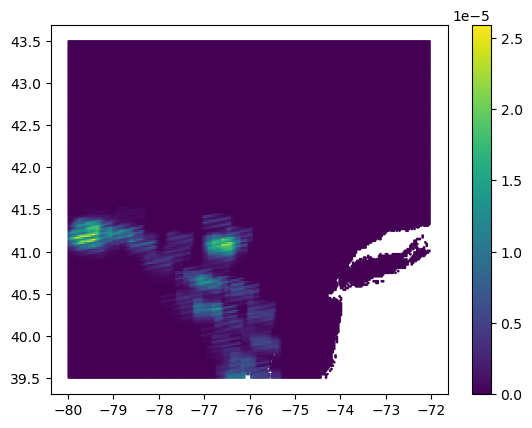

In [148]:
plt.scatter(ctl.lons,ctl.lats,c=np.array(h.todense()[0]),s=1); plt.colorbar()

In [105]:
np.arange(ctl.south,ctl.north+ctl.lat_resolution/2,ctl.lat_resolution).shape

(200,)

In [106]:
ctl.nlatgrids

199.0

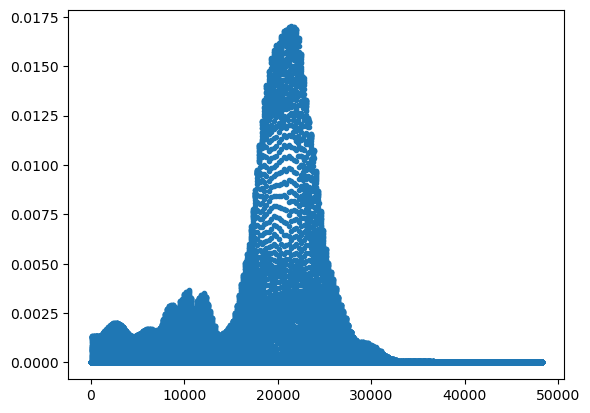

In [128]:
plt.plot(h.todense().sum(0).T,'.')

In [130]:
200*266

53200

In [133]:
len(ctl.lats)

48255

In [135]:
np.array(h.todense()[0])

array([[0., 0., 0., ..., 0., 0., 0.]])

In [68]:
with open('../coarse_col_receptors.asc') as f:
    files = f.read().splitlines()
ft = np.zeros((776,24,100,133))
for fi in files:
    ft += Dataset(fi)['foot'][:]

Text(0.5, 1.0, 'True Emission')

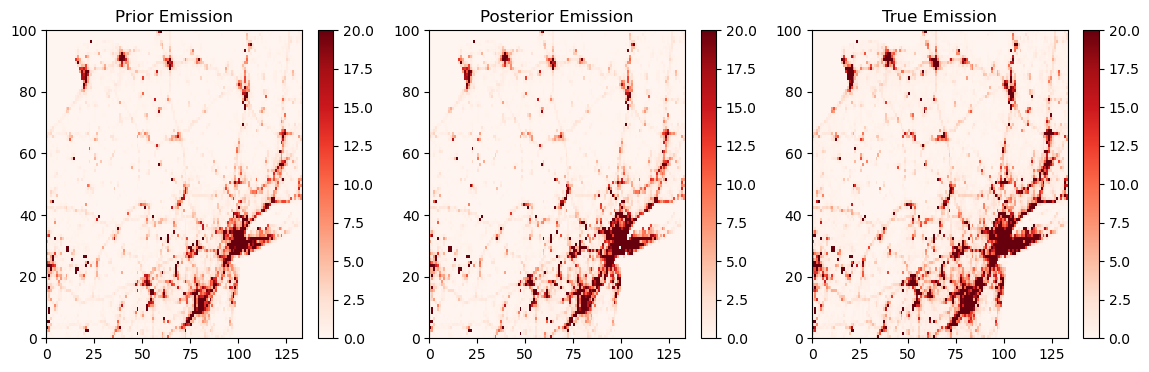

In [70]:
shat = Dataset('shat_acesprior_aces2xtruth.nc')['shat'][:]
apri = Dataset('sprior.nc')['sprior'][:]
true = Dataset('aces2x_4km_6km_prior_daily_mean.nc')['sprior'][:]
sig = Dataset('prior_uncert.nc')['sigma'][:]

fig,axs = plt.subplots(1,3,figsize=(14,4))
#prior
g = axs[0].pcolormesh(apri[1],cmap=plt.cm.Reds,vmin=0,vmax=20); 
plt.colorbar(g,ax=axs[0])
axs[0].set_title('Prior Emission')
#Posterior
g = axs[1].pcolormesh(shat[1],cmap=plt.cm.Reds,vmin=0,vmax=20); 
plt.colorbar(g,ax=axs[1])
axs[1].set_title('Posterior Emission')
#True
g = axs[2].pcolormesh(true[1],cmap=plt.cm.Reds,vmin=0,vmax=20); 
plt.colorbar(g,ax=axs[2])
axs[2].set_title('True Emission')

In [54]:
print(f'Mean Post Flux Error: {np.mean((shat-true).mean(0).flatten()[inds]):5.3f}')
print(f'Mean Prior Flux Error: {np.mean((apri-true).mean(0).flatten()[inds]):5.3f}')
print(f'Mean Flux Increment: {np.mean((apri-shat).mean(0).flatten()[inds]):5.3f}')
print()
print(f'Median Post Flux Error: {np.median((shat-true).mean(0).flatten()[inds]):5.3f}')
print(f'Median Prior Flux Error: {np.median((apri-true).mean(0).flatten()[inds]):5.3f}')
print(f'Median Flux Increment: {np.median((apri-shat).mean(0).flatten()[inds]):5.3f}')
print()
print(f'Post Flux RMSE: {np.sqrt(np.mean(((shat-true).mean(0).flatten()**2)[inds])):5.3f}')
print(f'Prior Flux RMSE: {np.sqrt(np.mean(((apri-true).mean(0).flatten()**2)[inds])):5.3f}')
print(f'Prior-Post RMSE: {np.sqrt(np.mean(((apri-shat).mean(0).flatten()**2)[inds])):5.3f}')

Mean Post Flux Error: -1.219
Mean Prior Flux Error: -2.809
Mean Flux Increment: -1.590

Median Post Flux Error: -0.280
Median Prior Flux Error: -0.311
Median Flux Increment: -0.000

Post Flux RMSE: 9.104
Prior Flux RMSE: 16.036
Prior-Post RMSE: 16.975


/Users/seancrowell/miniconda3/envs/mpl/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
inds = np.where(true.mean(0).flatten() > 0.1)
fig,axs = plt.subplots(1,1)
axs.hist((shat-true).mean(0).flatten()[inds]/(apri-true).mean(0).flatten()[inds]),bins=np.linspace(0,2,201));

Text(0.5, 1.0, 'Footprint Total Sensitivity')

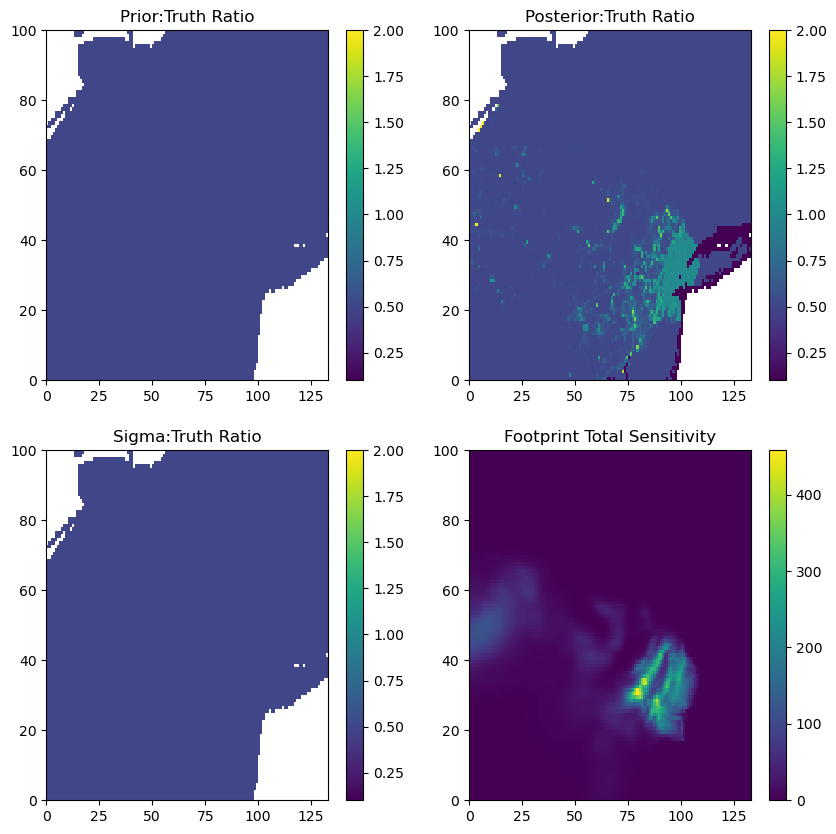

In [72]:
fig,axs = plt.subplots(2,2,figsize=(10,10))

ax = axs[0,0]
g = ax.pcolormesh(apri[1]/true[1],vmin=0.1,vmax=2)
plt.colorbar(g,ax=ax)
ax.set_title('Prior:Truth Ratio')

ax = axs[0,1]
g = ax.pcolormesh(shat[1]/true[1],vmin=0.1,vmax=2)
plt.colorbar(g,ax=ax)
ax.set_title('Posterior:Truth Ratio')

ax = axs[1,0]
g = ax.pcolormesh(sig[1]/true[1],vmin=0.1,vmax=2)
plt.colorbar(g,ax=ax)
ax.set_title('Sigma:Truth Ratio')

ax = axs[1,1]
g = ax.pcolormesh(ft.sum((0,1)))
plt.colorbar(g,ax=ax)
ax.set_title('Footprint Total Sensitivity')

Text(0.5, 1.0, 'Mismatch with Obs Before and After Optimization')

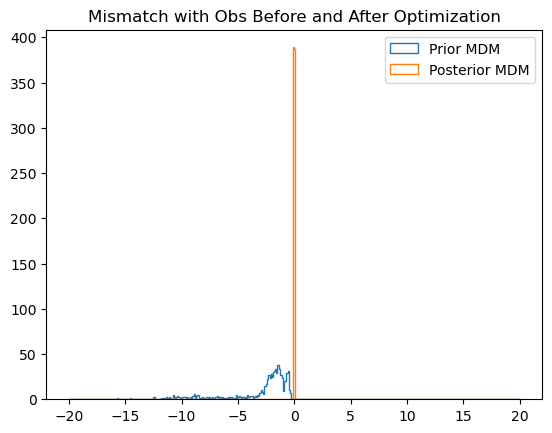

In [67]:
ctl = lpdm.lpdm('config.ini')
apri = ctl.load_file('sprior.nc','sprior')
tru = ctl.load_file('aces2x_4km_6km_prior_daily_mean.nc','sprior')

hsp = ctl.convolve(apri)
hst = ctl.convolve(tru)
hsp2 = np.loadtxt('hsprior.txt')
zhsp = np.loadtxt('zhsp.txt')
hsh = np.loadtxt('hshat.txt')

plt.hist(hsp-hst,bins=np.linspace(-20,20,401),histtype='step');
plt.hist(hsh-hst,bins=np.linspace(-20,20,401),histtype='step');
plt.legend(['Prior MDM','Posterior MDM'])
plt.title('Mismatch with Obs Before and After Optimization')